In [216]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import os
import re

In [217]:
r=requests.get("https://gardenlux-tr.decorexpro.com/hozyajstvo/page/36")
soup = BeautifulSoup(r.content, "html.parser")

<!DOCTYPE html>
<html lang="tr">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
  <style media="all">
   .yarpp_pro_msg{border:1px ridge #d0d0d0;padding:.4em 2em .8em;text-align:justify}.yarpp_pro_msg strong{display:inline-block;text-align:center;width:100%;color:orange}.yarpp_help .wp-pointer-content p{text-align:left;font-family:sans-serif}.yarpp_help_msg{position:absolute;left:25px;display:none;border:1px solid #d0d0d0;width:250px;text-align:justify;padding:10px 15px;background-color:#fff;box-shadow:0 0 .4em -.15em #333;z-index:100}.yarpp_help:hover .yarpp_help_msg{display:block}
.widget_wysija_cont .inputContainer{position:relative;float:left}.widget_wysija_cont .ajaxSubmit{padding:20px;background:#55ea55;border:1px solid #999;display:none}.formError{position:absolute;top:300px;left:300px;display:block;z-index:5000;cursor:pointer}.formError .formErrorContent{background:none repeat scroll 0 0 #8e2121;border
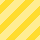
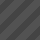
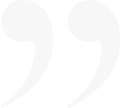

In [218]:
print(soup.prettify())

In [219]:
images=soup.find_all("div",attrs={"class":"col-xl-4 col-6 box--archive box--hover box--img-link"})
images

[<div class="col-xl-4 col-6 box--archive box--hover box--img-link">
 <picture class="box__picture mr-2">
 <img alt="Tavşanlarda kulak hastalığı: nasıl tedavi edilir" class="img-fluid w-100 rounded box__img wp-post-image" data-lazy-src="https://gardenlux-bg.decorexpro.com/wp-content/uploads/2017/06/2-27-320x240.jpg" height="240" loading="lazy" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20320%20240'%3E%3C/svg%3E" width="320"/><noscript><img alt="Tavşanlarda kulak hastalığı: nasıl tedavi edilir" class="img-fluid w-100 rounded box__img wp-post-image" data-lazy-src="https://gardenlux-bg.decorexpro.com/wp-content/uploads/2017/06/2-27-320x240.jpg" height="240" loading="lazy" src="data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%20320%20240'%3E%3C/svg%3E" width="320"/></noscript> </picture><div class="box__title-wrap">
 <a class="box__title" href="https://gardenlux-tr.decorexpro.com/hozyajstvo/zhivotnovodstvo/bolezn-ushej

In [220]:
def temizle_dosya_adi(adi):
    return re.sub(r'[<>:"/\\|?*]', '_', adi)  # Geçersiz karakterleri alt çizgiyle değiştirir

In [221]:
# Base URL
base_url = 'https://gardenlux-tr.decorexpro.com/hozyajstvo/page/36'
# Ana sayfa HTML'ini çekme
response = requests.get(base_url)
response.raise_for_status()  # Hata durumunda exception fırlat
soup = BeautifulSoup(response.text, "html.parser")

In [222]:
  # Sayfadaki tüm linkleri bul
for a_tag in soup.find_all('a', class_='box__title'):
        linkler = a_tag.get('href')

        if linkler:
            # Göreli URL'yi tam URL'ye dönüştür
            href = urljoin(base_url, linkler)
            print(f"Link: {href}")

            try:
                # Linkin HTML içeriğini al
                response = requests.get(href)
                response.raise_for_status()  # Hata durumunda exception fırlat
                soup = BeautifulSoup(response.text, "html.parser")

                # Sayfanın başlığını al ve geçersiz karakterleri temizle
                page_title = soup.title.get_text() if soup.title else "Başlık Bulunamadı"
                file_name = re.sub(r'[\\/*?:"<>|]', '_', page_title)  # Geçersiz karakterleri '_' ile değiştir
                file_name = re.sub(r'[^\w\s-]', '', file_name)  # Diğer özel karakterleri kaldır
                file_name = file_name.replace(" ", "_")  # Boşlukları da '_' ile değiştir

                 # Dosya adı çok uzun olursa kesmek
                if len(file_name) > 200:  # Windows uzunluk sınırına yakın (260 karakter)
                    file_name = file_name[:200]


                # Dosya yolu ve klasörü oluştur
                folder_path = os.path.join("indirilen_sayfalar", file_name)

                # Klasör yoksa oluştur
                if not os.path.exists(folder_path):
                    os.makedirs(folder_path)

                # Dosya yolunu tam olarak oluştur
                file_path = os.path.join(folder_path, f"{file_name}.txt")

                # Sayfadaki metni al (örneğin başlık ve içerik)
                page_content = soup.get_text()

                # Sayfa içeriğini dosyaya kaydet
                with open(file_path, "w", encoding="utf-8") as file:
                    file.write(f"Sayfa Başlığı: {page_title}\n\n")
                    file.write(f"Sayfa İçeriği:\n{page_content}\n\n")

                print(f"Metin kaydedildi: {file_path}")

                # Sayfadaki tüm <img> etiketlerini bul
                img_tags = soup.find_all("img")
                for img in img_tags:
                    img_src = img.get("src")
                    if img_src:  # Eğer 'src' varsa
                        img_url = urljoin(base_url, img_src)  # Tam URL'yi oluştur
                        print(f"İndiriliyor: {img_url}")

                        try:
                            # Görseli indir
                            img_data = requests.get(img_url).content

                            # Görsel dosya ismini oluştur
                            img_name = os.path.basename(img_url)
                            img_path = os.path.join(folder_path, img_name)

                            # Görseli kaydet
                            with open(img_path, "wb") as img_file:
                                img_file.write(img_data)
                            print(f"Görsel kaydedildi: {img_path}")

                            # Görseli metin dosyasına ekle
                            with open(file_path, "a", encoding="utf-8") as file:
                                file.write(f"Görsel: {img_url}\n")

                        except requests.exceptions.RequestException as e:
                            print(f"Görsel indirilemedi: {img_url}, Hata: {e}")

            except requests.exceptions.RequestException as e:
                print(f"Linke gidilemedi: {href}, Hata: {e}")

Link: https://gardenlux-tr.decorexpro.com/hozyajstvo/zhivotnovodstvo/bolezn-ushej-u-krolikov-chem-lechit.html
Metin kaydedildi: indirilen_sayfalar\Tavşanlarda_kulak_hastalıkları__semptomlar_ve_tedavisi\Tavşanlarda_kulak_hastalıkları__semptomlar_ve_tedavisi.txt
İndiriliyor: data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%200%200'%3E%3C/svg%3E
Görsel indirilemedi: data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%200%200'%3E%3C/svg%3E, Hata: No connection adapters were found for "data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%200%200'%3E%3C/svg%3E"
İndiriliyor: https://gardenlux-bg.decorexpro.com/wp-content/uploads/userfiles/1590_1.jpg
Görsel kaydedildi: indirilen_sayfalar\Tavşanlarda_kulak_hastalıkları__semptomlar_ve_tedavisi\1590_1.jpg
İndiriliyor: data:image/svg+xml,%3Csvg%20xmlns='http://www.w3.org/2000/svg'%20viewBox='0%200%200%200'%3E%3C/svg%3E
Görsel indirilemedi: data:image/svg+xml,%3Cs